This program demonstrate how to simulate a simple Si waveguide using GDSfactory and tidy3d package. The waveguide is imported from GDSfactory generic pdk and FDTD based solver tidy 3D is used to perform the simulations.  

In [85]:
# Load all the relevant packages 

import gdsfactory as gf

from gdsfactory.components.taper import taper_sc_nc
import numpy as np 
import matplotlib.pyplot as plt 
import gdsfactory.simulation as sim
import gdsfactory.simulation.gtidy3d as gt
import gdsfactory.config as gf
from gdsfactory.config import PATH
import tidy3d as td 


 Tidy3d library contains the reflective index of Si and SiO2. First, we plot the refractive index from tidy3d library for a wavelength range of 1500 - 1600 nm. 


Text(0, 0.5, 'cSi refractive')

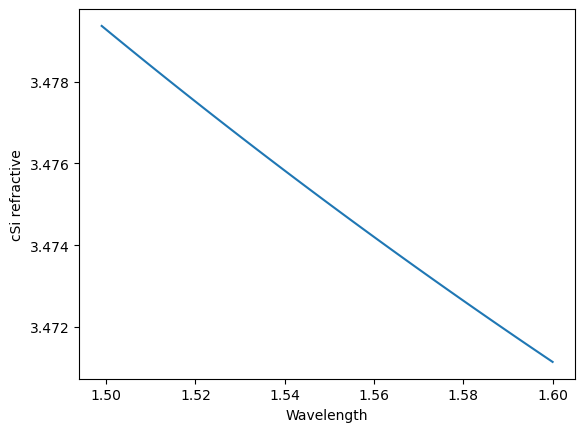

In [126]:
nm = 1e-3
wavelength = np.linspace(1499, 1600) *nm
f = td.C_0 / wavelength 
eps_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
n, k = td.Medium.eps_complex_to_nk(eps_complex)

plt.plot(wavelength, n)
plt.xlabel("Wavelength")
plt.ylabel("cSi refractive")


Text(0, 0.5, 'SiO2 refractive')

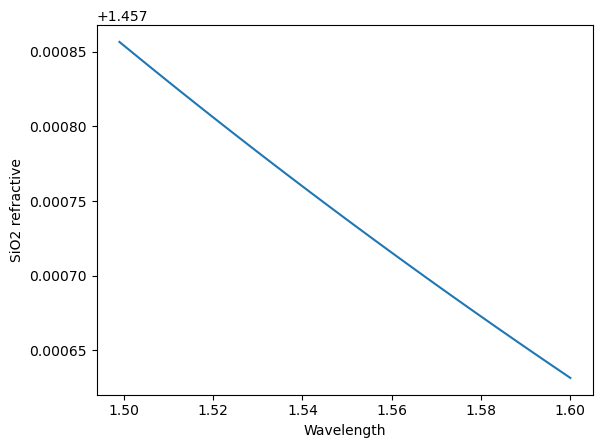

In [145]:
eps_complex_sio2 = td.material_library['SiO2']['Horiba'].eps_model(f)  # Complex-valued permittivity as a function of frequency. 
n, k = td.Medium.eps_complex_to_nk(eps_complex_sio2)

plt.plot(wavelength, n)
plt.xlabel("Wavelength")
plt.ylabel("SiO2 refractive")

Import the straight waveguide from the GDSfactory library. get_simulation to run the simulation. 

[16:45:47] WARNING  Structure at structures[1] has bounds that extend exactly to simulation       simulation.py:373
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

           WARNING  Structure at structures[1] has bounds that extend exactly to simulation       simulation.py:373
                    edges. This can cause unexpected behavior. If intending to extend the                          
                    structure to infinity along one dimension, use td.inf as a size variable                       
                    instead to make this explicit.                                                                 

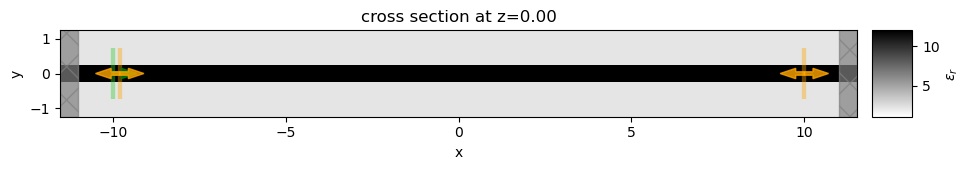

In [154]:
import gdsfactory as gf
c = gf.components.straight(length = 20)
s = gt.get_simulation(c, is_3d=False)
fig = gt.plot_simulation(s)

In [181]:
help(gt.get_simulation)

Help on cython_function_or_method in module gdsfactory.simulation.gtidy3d.get_simulation:

get_simulation(component: 'ComponentSpec', port_extension: 'Optional[float]' = 4.0, layer_stack: 'Optional[LayerStack]' = None, thickness_pml: 'float' = 1.0, xmargin: 'float' = 0, ymargin: 'float' = 0, xmargin_left: 'float' = 0, xmargin_right: 'float' = 0, ymargin_top: 'float' = 0, ymargin_bot: 'float' = 0, zmargin: 'float' = 1.0, clad_material: 'str' = 'sio2', port_source_name: 'str' = 'o1', port_margin: 'float' = 0.5, port_source_offset: 'float' = 0.1, distance_source_to_monitors: 'float' = 0.2, wavelength_start: 'float' = 1.5, wavelength_stop: 'float' = 1.6, wavelength_points: 'int' = 50, plot_modes: 'bool' = False, num_modes: 'int' = 2, run_time_ps: 'float' = 10.0, material_name_to_tidy3d: 'Optional[Dict[str, str]]' = None, is_3d: 'bool' = True, with_all_monitors: 'bool' = False, boundary_spec: 'Optional[td.BoundarySpec]' = None, grid_spec: 'Optional[td.GridSpec]' = None, sidewall_angle_deg: 

Plotting the mode profile of the waveguide at y = 0. 

[17:47:14] WARNING  Mode field at frequency index 0, mode index 0 does not decay at the plane    mode_solver.py:354
                    boundaries.                                                                                    

Effective index of computed modes:  [[2.4226654 1.7195967]]


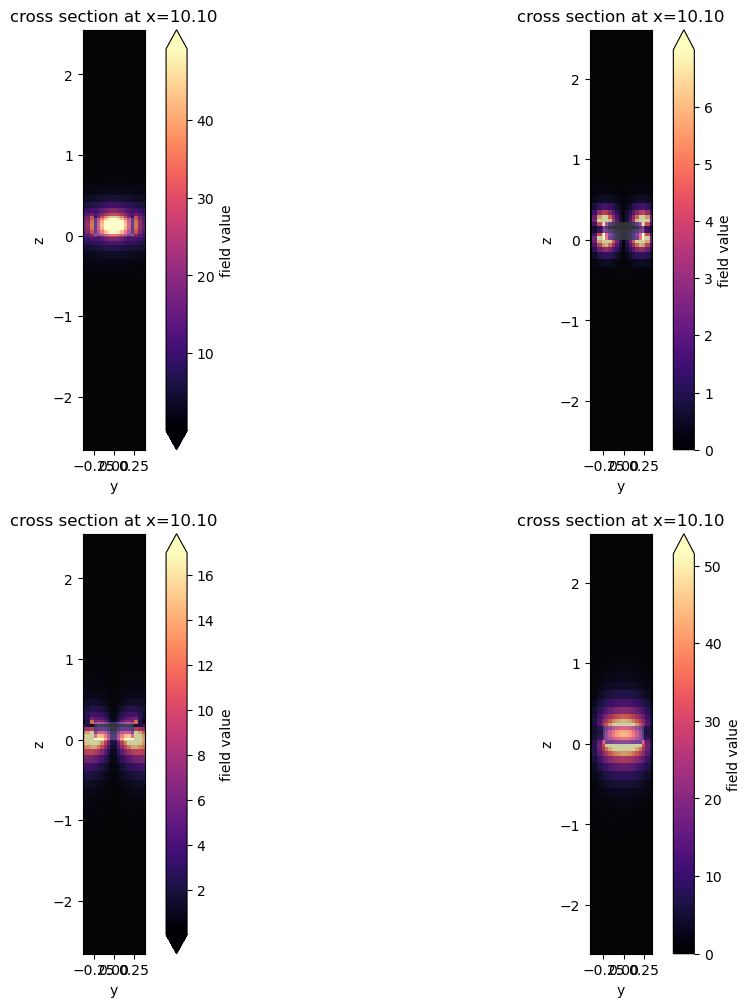

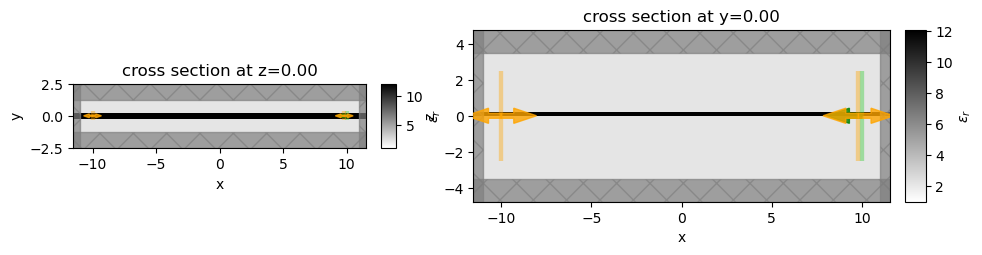

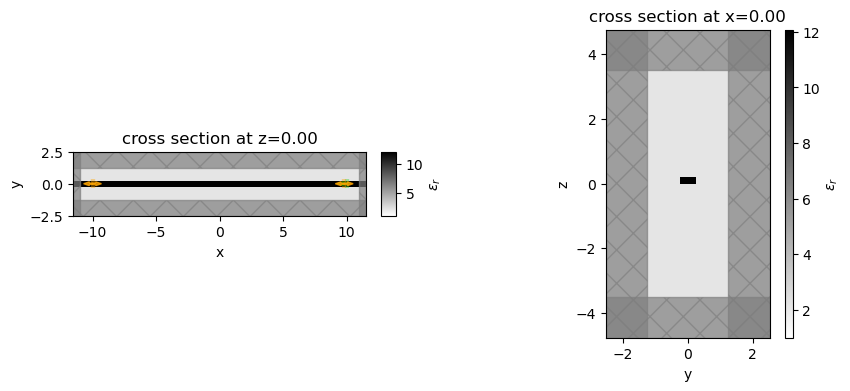

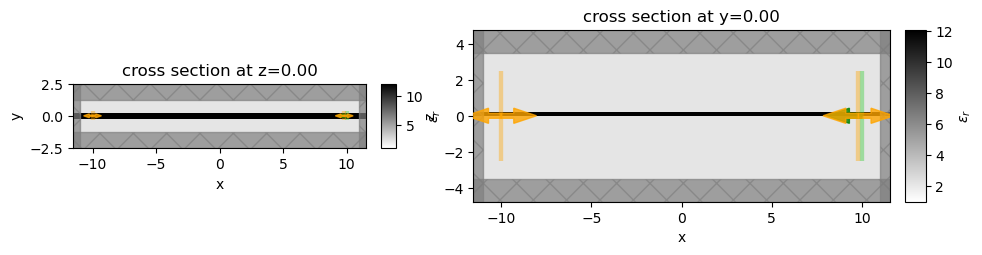

In [204]:
c = gf.components.straight(length = 20)
s = gt.get_simulation(c, port_margin=0.1, plot_modes = True, port_source_name="o2")
fig = gt.plot_simulation(s, y=0)  # see input
fig = gt.plot_simulation_xz(s)
fig = gt.plot_simulation_yz(s)

In [205]:
sp = gt.write_sparameters(c)

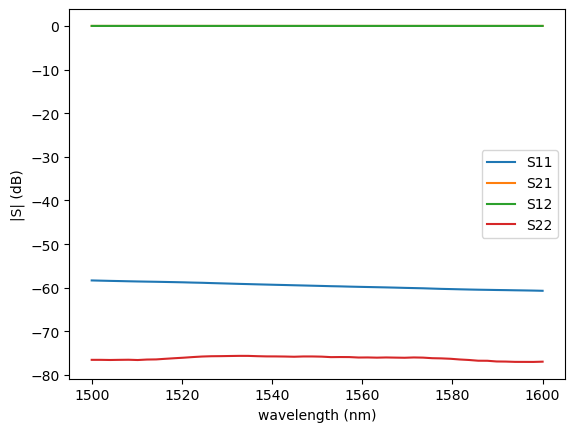

In [206]:
sim.plot.plot_sparameters(sp)

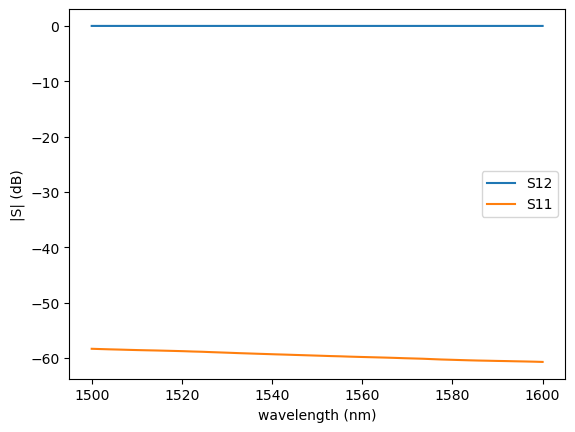

In [207]:
sim.plot.plot_sparameters(sp, keys=("o1@0,o2@0", "o1@0,o1@0"))